# Introduction:

Loan Approval is a classification problem in which we need to classify whether the loan will be approved or not.

## Problem Statement

Housing Finance company deals in all kinds of home loans.The customer first applies for a home loan and after that, the company validates the customer eligibility for the loan.The company wants to automate the loan eligibility process  based on customer details.hese details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.

## Dataset

This is a Binary Classification problem in which we need to predict our Target label which is “Loan Status”.

Loan status can have two values: Yes or NO.

Yes: if the loan is approved

NO: if the loan is not approved

# Python Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report

Training Dataset

In [2]:
Dataset=pd.read_csv("D:\Ashvini\Data Science\Data for practise\Loan_approval.csv")
test_set=pd.read_csv("D:\Ashvini\Data Science\Data for practise\loan_approval Test Dataset.csv")

In [3]:
df=Dataset

In [4]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.shape

(614, 13)

In [7]:
df.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## DATA PREPROCESSING

In [8]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [9]:
df.drop('loan_id',axis=1,inplace=True)


In [10]:
test_set.drop('loan_id',axis=1,inplace=True)

In [11]:
df.married.unique()

array(['no', 'yes', nan], dtype=object)

In [12]:
married_mode=df.married.mode()

In [13]:
married_mode

0    yes
Name: married, dtype: object

In [14]:
df['married'].fillna(married_mode[0],inplace=True)

In [15]:
cate_null=['gender','married','dependents','self_employed','credit_history']

In [16]:
for i in cate_null:
    a=df[i].unique()
    
    f_mode=df[i].mode()
    df[i].fillna(f_mode[0],inplace=True)

In [17]:
df.loan_amount_term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [18]:
df.loanamount.unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [19]:
df['loanamount'].fillna(df.loanamount.mode()[0],inplace=True)

In [20]:
df['loan_amount_term'].fillna(df.loan_amount_term.mode()[0],inplace=True)

In [21]:
df.isnull().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

CHECK FOR DUPLICATES

In [22]:
df.duplicated().sum()

0

In [23]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0,graduate,no,5849,0.0,120.0,360.0,1.0,urban,y
1,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


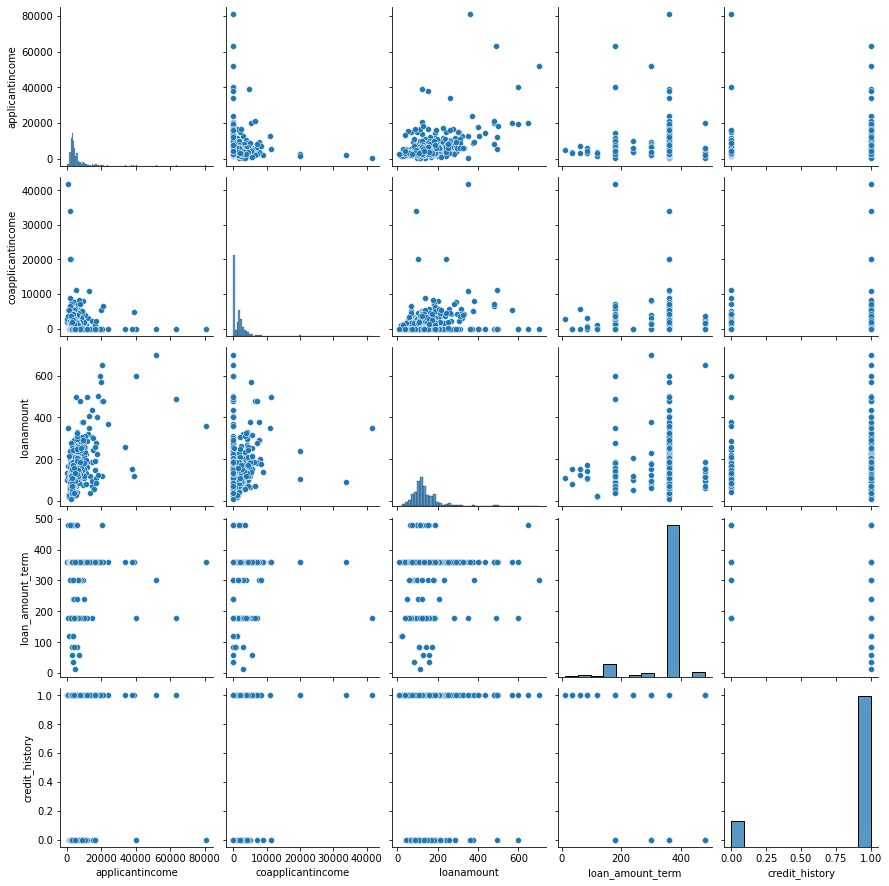

In [24]:
sns.pairplot(df)

FEATURE EXTRACTION

In [25]:
cate=['gender','married','self_employed','property_area','loan_status','education']

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in cate:
    df[i]=encoder.fit_transform(df[i])

In [27]:
df.dependents =df.dependents .replace('3+','3')

In [28]:
df.dependents.unique()

array(['0', '1', '2', '3'], dtype=object)

<AxesSubplot:>

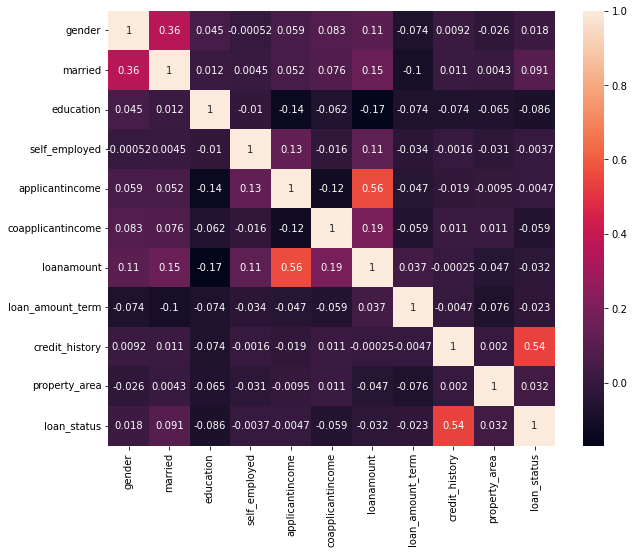

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [30]:
x=df.drop(['loan_status'],axis=1)

In [31]:
x.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [32]:
x.shape

(614, 11)

In [33]:
y=df.loan_status

In [34]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int32

In [35]:
y.shape

(614,)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [38]:
X_train.shape

(491, 11)

In [39]:
X_test.shape

(123, 11)

FEATURE SCALING

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [42]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

MODEL SELECTION

In [43]:
from sklearn.svm import SVC

In [44]:
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train) 

SVC(kernel='linear', random_state=0)

In [45]:
y_pred= classifier.predict(X_test) 
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
y_pred.shape

(123,)

In [47]:
y_test

350    1
377    1
163    1
609    1
132    1
      ..
231    1
312    1
248    1
11     1
333    1
Name: loan_status, Length: 123, dtype: int32

In [48]:
y_test.shape

(123,)

In [49]:
classifier.score(X_test,y_test)

0.7886178861788617

In [50]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred,labels=[True,False])

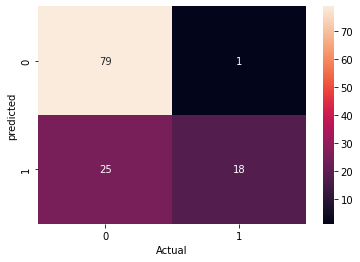

In [51]:
sns.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [52]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report

In [53]:
classification_report(y_test,y_pred,output_dict=True)

{'0': {'precision': 0.9473684210526315,
  'recall': 0.4186046511627907,
  'f1-score': 0.5806451612903226,
  'support': 43},
 '1': {'precision': 0.7596153846153846,
  'recall': 0.9875,
  'f1-score': 0.8586956521739131,
  'support': 80},
 'accuracy': 0.7886178861788617,
 'macro avg': {'precision': 0.853491902834008,
  'recall': 0.7030523255813954,
  'f1-score': 0.7196704067321178,
  'support': 123},
 'weighted avg': {'precision': 0.8252526249958856,
  'recall': 0.7886178861788617,
  'f1-score': 0.7614910090194872,
  'support': 123}}

In [54]:
accuracy_score(y_test,y_pred)

0.7886178861788617

In [55]:
#testing score
classifier.score(X_test,y_test)

0.7886178861788617

In [56]:
#training score
classifier.score(X_train,y_train)

0.814663951120163

In [57]:
f1_score(y_test,y_pred)

0.8586956521739131

In [58]:
precision_score(y_test,y_pred)

0.7596153846153846

In [59]:
recall_score(y_test,y_pred)

0.9875

TESTING DATASET

In [60]:
test_set.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [61]:
df1=test_set

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             356 non-null    object 
 1   married            367 non-null    object 
 2   dependents         357 non-null    object 
 3   education          367 non-null    object 
 4   self_employed      344 non-null    object 
 5   applicantincome    367 non-null    int64  
 6   coapplicantincome  367 non-null    int64  
 7   loanamount         362 non-null    float64
 8   loan_amount_term   361 non-null    float64
 9   credit_history     338 non-null    float64
 10  property_area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [63]:
df1.shape

(367, 11)

In [64]:
df1.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [65]:
df1.isnull().sum()

gender               11
married               0
dependents           10
education             0
self_employed        23
applicantincome       0
coapplicantincome     0
loanamount            5
loan_amount_term      6
credit_history       29
property_area         0
dtype: int64

In [66]:
df1.gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [67]:
df1.dependents=df1.dependents.replace('3+','3')

In [68]:
df1.dependents.unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [69]:
df1.self_employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [70]:
df1.loanamount.unique()

array([110., 126., 208., 100.,  78., 152.,  59., 147., 280., 123.,  90.,
       162.,  40., 166., 124., 131., 200., 300.,  48.,  28., 101., 125.,
       290., 148., 140., 275.,  57.,  75., 192., 158., 176., 185., 116.,
       138.,  84., 108., 187., 120., 160.,  30.,  92., 130., 134., 189.,
       135., 188.,  95.,  65., 139., 232., 144., 155., 186.,  50.,  nan,
       163., 360., 149., 257., 102.,  77., 390., 256.,  61., 107., 119.,
       165.,  93., 122., 157., 180.,  80., 104., 213., 146.,  71., 225.,
        70., 132., 105.,  83., 103., 150., 550., 260., 199., 113., 117.,
        72., 214., 133., 143., 209., 170.,  94.,  79., 159., 173., 235.,
       336.,  96., 128., 412., 114., 115.,  88.,  55., 118., 212.,  74.,
        66.,  64., 142., 151.,  81., 171., 234., 184., 112.,  49.,  99.,
       240., 460., 297., 106., 141., 145., 177.,  68., 183., 121., 153.,
        67., 181.,  35.,  46.,  87., 137., 254., 109., 197.,  85.,  60.,
        76.,  98.])

In [71]:
df1.loan_amount_term.unique()

array([360., 240., 180.,  nan,  60., 480.,  84.,  12., 300., 350.,  36.,
       120.,   6.])

In [72]:
df1.credit_history.unique()

array([ 1., nan,  0.])

In [73]:
df1['gender'].fillna(df1.gender.mode()[0],inplace=True)

In [74]:
df1['dependents'].fillna(df1.dependents.mode()[0],inplace=True)

In [75]:
df1['self_employed'].fillna(df1.self_employed.mode()[0],inplace=True)

In [76]:
df1['loanamount'].fillna(df1.loanamount.mode()[0],inplace=True)

In [77]:
df1['loan_amount_term'].fillna(df1.loan_amount_term.mode()[0],inplace=True)

In [78]:
df1['credit_history'].fillna(df1.credit_history.mode()[0],inplace=True)

In [79]:
df1.isnull().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
dtype: int64

In [80]:
df1.duplicated(). drop_duplicates()

0      False
195     True
dtype: bool

In [81]:
df1.drop_duplicates(inplace=True)

In [82]:
df1.duplicated().sum()

0

In [83]:
testcate=['gender','married','self_employed','property_area','education']

In [84]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in testcate:
    df1[i]=encoder.fit_transform(df1[i])

In [85]:
scaler=StandardScaler()
df2=scaler.fit_transform(df1)

In [86]:
df2

array([[ 0.48629876,  0.7555233 , -0.75985412, ...,  0.26641099,
         0.43838614,  1.1222116 ],
       [ 0.48629876,  0.7555233 ,  0.17969523, ...,  0.26641099,
         0.43838614,  1.1222116 ],
       [ 0.48629876,  0.7555233 ,  1.11924458, ...,  0.26641099,
         0.43838614,  1.1222116 ],
       ...,
       [ 0.48629876, -1.32358592, -0.75985412, ...,  0.26641099,
         0.43838614, -0.09296427],
       [ 0.48629876,  0.7555233 , -0.75985412, ...,  0.26641099,
         0.43838614, -1.30814015],
       [ 0.48629876, -1.32358592, -0.75985412, ..., -2.51771911,
         0.43838614, -1.30814015]])

In [87]:
test_pred=classifier.predict(df2)

In [88]:
(test_pred)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [89]:
df1['status']=test_pred

In [90]:
df1.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,status
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,1
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1
